# Event Data Visualization in Football: Different Heatmap Styles

I will be using data from StatsBomb, specifically selecting the Argentina versus France match in the 2022 World Cup. 
The match id is :  3869685


In [3]:
from mplsoccer import Sbopen, Pitch, VerticalPitch
import statsbombpy

In [11]:
# Defining the match ID for which events will be analyzed
match_id = 3869685

# Initializing the parser object to read event data from StatsBomb
parser = Sbopen()

# Retrieving the event data for the specified match ID
events = parser.event(match_id)[0]  # Fetching the first dataframe which contains all the events for the match

# Focusing only on passes for this analysis
# Creating a mask to filter passes made by Argentina
mask = (events.type_name == 'Pass') & (events.team_name == "Argentina")

# Applying the mask to filter relevant columns: start and end positions, player info, and pass details
df_ar = events.loc[mask, ["x", 'y', 'end_x', 'end_y', 'player_name', "id", "type_name", "outcome_name", "minute", 'second', "under_pressure"]]

# Filtering passes made by France for comparison or analysis
# Creating a mask to filter passes made by France
mask_fr = (events.type_name == 'Pass') & (events.team_name == "France")

# Applying the mask to extract relevant columns for French passes
df_fr = events.loc[mask_fr, ["x", 'y', 'end_x', 'end_y', 'player_name', "id", "type_name", "outcome_name", "minute", 'second', "under_pressure"]]


In [12]:
df_ar.head()

,x,y,end_x,end_y,player_name,id,type_name,outcome_name,minute,second,under_pressure
9,22.7,80.0,36.0,75.2,Nahuel Molina Lucero,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,Pass,NaN,0,16,NaN
15,41.1,73.9,23.2,62.8,Rodrigo Javier De Paul,27829865-a43c-4c50-b545-b09e8a965e16,Pass,NaN,0,31,NaN
18,24.7,59.4,21.5,32.2,Cristian Gabriel Romero,59420b0c-94cc-4fb8-86fb-e1105936f6eb,Pass,NaN,0,34,NaN
21,24.0,27.1,21.7,49.3,Nicolás Hernán Otamendi,71cb648d-11fe-4275-b838-cbcfc62bee04,Pass,NaN,0,39,NaN
24,22.1,49.8,24.0,27.3,Cristian Gabriel Romero,4fd86774-8f37-4ea2-b562-b1a43c5adedf,Pass,NaN,0,43,NaN


In [13]:
df_fr.head()

,x,y,end_x,end_y,player_name,id,type_name,outcome_name,minute,second,under_pressure
4,61.0,40.1,48.0,43.2,Antoine Griezmann,f651a6c4-55e3-4e0f-a178-59414ba83d6a,Pass,NaN,0,0,NaN
7,49.7,43.6,96.0,1.8,Aurélien Djani Tchouaméni,a5956ecc-d637-44d2-8705-e2079e12013e,Pass,Out,0,2,NaN
60,68.5,5.7,72.1,13.4,Theo Bernard François Hernández,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,Pass,NaN,1,31,NaN
63,72.3,13.4,73.6,4.7,Adrien Rabiot,b10bc0c0-2bb9-4d19-80a7-d8e1c9d25a0d,Pass,NaN,1,33,NaN
67,73.2,4.0,47.1,7.4,Theo Bernard François Hernández,4b7c6ba4-6854-4806-b2ef-804060619a34,Pass,Unknown,1,34,1.0


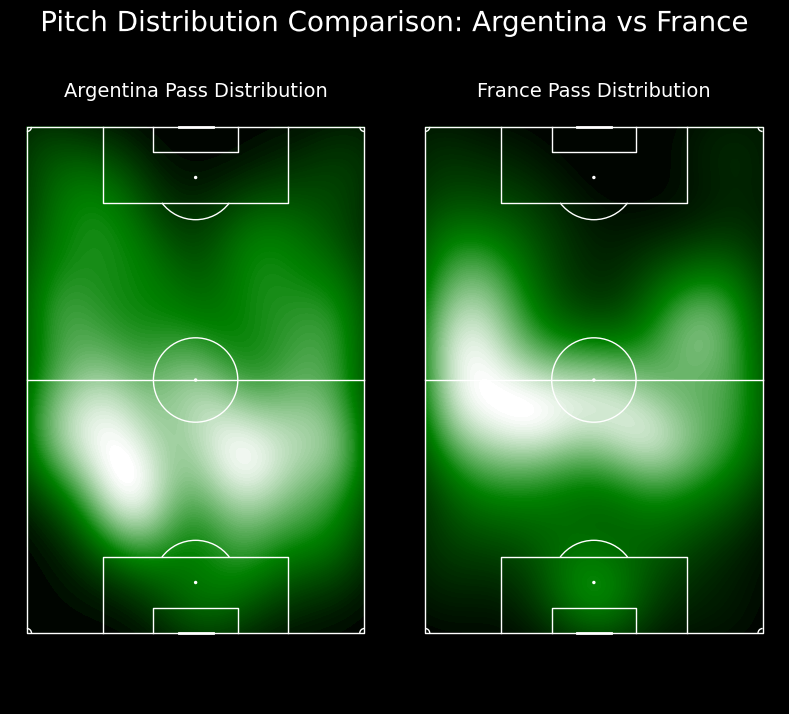

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch, FontManager
from matplotlib.colors import LinearSegmentedColormap

# Set background color for the figure
back = 'black'

# Custom colormap for the plot
flamingo_cmap = LinearSegmentedColormap.from_list("Green - 100 colors",
                                                  ['black', 'green', "white"], N=100)

# Initialize the pitch with custom settings
pitch = VerticalPitch(line_color="white", pitch_color=back, linestyle='-', linewidth=1, 
                      goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Create a grid layout for 2 pitches with space for titles
fig, axs = pitch.grid(ncols=2, grid_height=0.6, title_height=0.09, axis=False,
                      endnote_height=0.04, title_space=0.02, endnote_space=0.02)

# Set the background color for the figure
fig.set_facecolor(back)

# Plot KDE for Argentina
p = pitch.kdeplot(df_ar.x, df_ar.y, ax=axs['pitch'][0],
                  shade=True, levels=290, shade_lowest=True,
                  cut=4, cmap=flamingo_cmap)

# Plot KDE for France
p = pitch.kdeplot(df_fr.x, df_fr.y, ax=axs['pitch'][1],
                  shade=True, levels=290, shade_lowest=True,
                  cut=4, cmap=flamingo_cmap)

# Font effects for title and subtitles
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
fm = FontManager('https://github.com/google/fonts/blob/main/ofl/sedgwickave/'
                 'SedgwickAve-Regular.ttf?raw=true')

# Add main title at the top
axs['title'].text(0.5, 0.85, "Pitch Distribution Comparison: Argentina vs France",
                  path_effects=text_effects, va='center', ha='center', 
                  color='w', fontsize=20)

# Add subtitles for each pitch
axs['pitch'][0].set_title("Argentina Pass Distribution", fontsize=14, color='white', pad=10)
axs['pitch'][1].set_title("France Pass Distribution", fontsize=14, color='white', pad=10)

# Adjust layout to ensure space between title and subplots
plt.subplots_adjust(top=0.9, hspace=0.3)




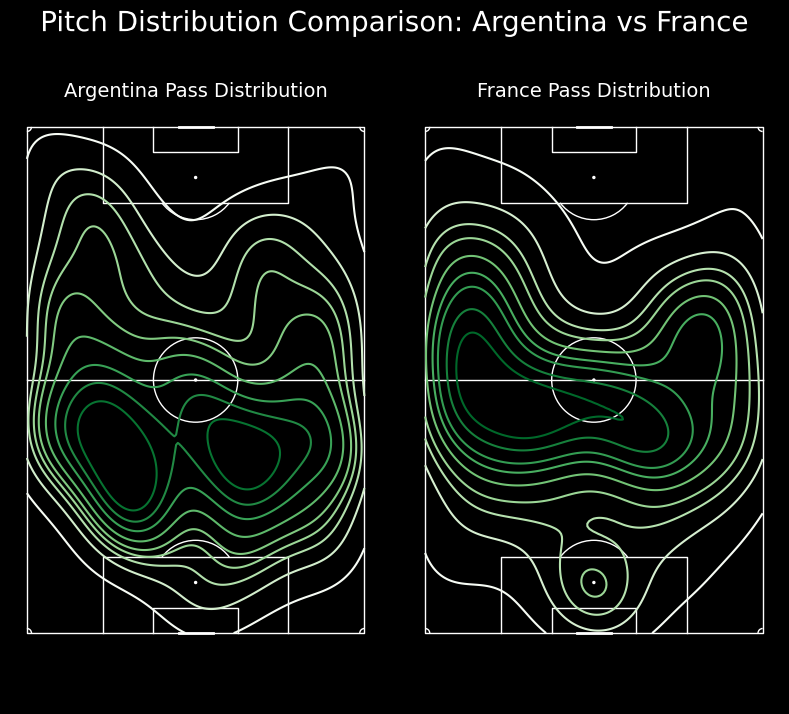

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch, FontManager
from matplotlib.colors import LinearSegmentedColormap

# Set background color for the figure
back = 'black'


# Initialize the pitch with custom settings
pitch = VerticalPitch(line_color="white", pitch_color=back, linestyle='-', linewidth=1, 
                      goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Create a grid layout for 2 pitches with space for titles
fig, axs = pitch.grid(ncols=2, grid_height=0.6, title_height=0.09, axis=False,
                      endnote_height=0.04, title_space=0.02, endnote_space=0.02)

# Set the background color for the figure
fig.set_facecolor(back)

# Plot KDE for Argentina
p = pitch.kdeplot(df_ar.x, df_ar.y, ax=axs['pitch'][0],
                  cmap='Greens')

# Plot KDE for France
p = pitch.kdeplot(df_fr.x, df_fr.y, ax=axs['pitch'][1], cmap='Greens')

# Font effects for title and subtitles
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
fm = FontManager('https://github.com/google/fonts/blob/main/ofl/sedgwickave/'
                 'SedgwickAve-Regular.ttf?raw=true')

# Add main title at the top
axs['title'].text(0.5, 0.85, "Pitch Distribution Comparison: Argentina vs France",
                  path_effects=text_effects, va='center', ha='center', 
                  color='w', fontsize=20)

# Add subtitles for each pitch
axs['pitch'][0].set_title("Argentina Pass Distribution", fontsize=14, color='white', pad=10)
axs['pitch'][1].set_title("France Pass Distribution", fontsize=14, color='white', pad=10)

# Adjust layout to ensure space between title and subplots
plt.subplots_adjust(top=0.9, hspace=0.3)





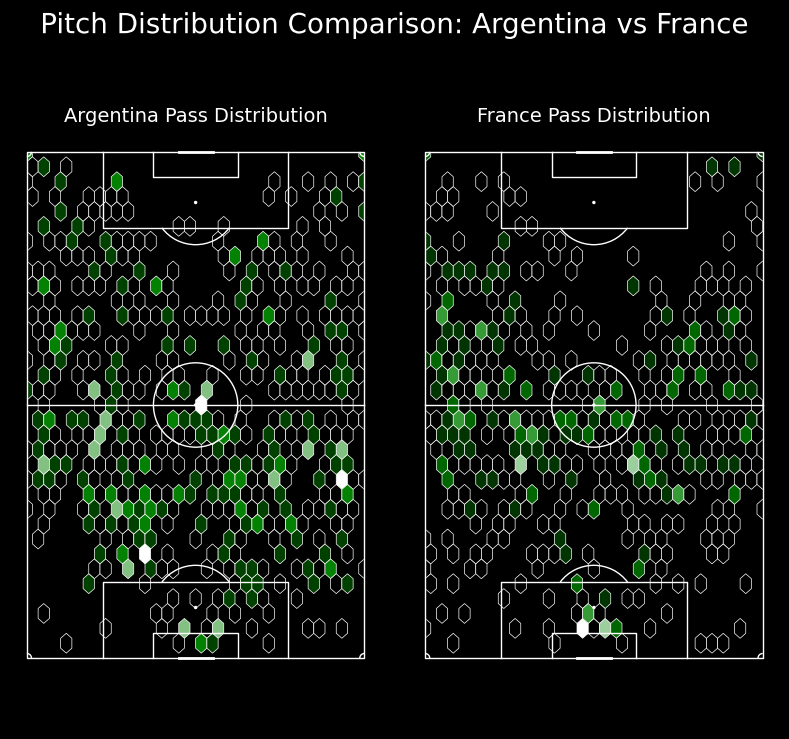

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch, FontManager
from matplotlib.colors import LinearSegmentedColormap

# Set background color for the figure
back = 'black'

# Custom colormap for the plot
flamingo_cmap = LinearSegmentedColormap.from_list("Green - 100 colors",
                                                  ['black', 'green', "white"], N=100)

# Initialize the pitch with custom settings
pitch = VerticalPitch(line_color="white", pitch_color=back, linestyle='-', linewidth=1, 
                      goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Create a grid layout for 2 pitches with space for titles
fig, axs = pitch.grid(ncols=2, grid_height=0.6, title_height=0.12, axis=False,
                      endnote_height=0.04, title_space=0.02, endnote_space=0.02)

# Set the background color for the figure
fig.set_facecolor(back)

# Plot hexbin for Argentina
p = pitch.hexbin(df_ar.x, df_ar.y, ax=axs['pitch'][0],
                 gridsize=30, cmap=flamingo_cmap, edgecolors='white', linewidths=0.5)

# Plot hexbin for France
p = pitch.hexbin(df_fr.x, df_fr.y, ax=axs['pitch'][1],
                 gridsize=30, cmap=flamingo_cmap, edgecolors='white', linewidths=0.5)

# Font effects for title and subtitles
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
fm = FontManager('https://github.com/google/fonts/blob/main/ofl/sedgwickave/'
                 'SedgwickAve-Regular.ttf?raw=true')

# Add main title at the top
axs['title'].text(0.5, 0.85, "Pitch Distribution Comparison: Argentina vs France",
                  path_effects=text_effects, va='center', ha='center', 
                  color='w', fontsize=20)

# Add subtitles for each pitch
axs['pitch'][0].set_title("Argentina Pass Distribution", fontsize=14, color='white', pad=10)
axs['pitch'][1].set_title("France Pass Distribution", fontsize=14, color='white', pad=10)

# Adjust layout to ensure space between title and subplots
plt.subplots_adjust(top=0.9, hspace=0.3)

